In [371]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

In [372]:
np.random.seed(42)
data = {
    "Umur": [15, 22, 28, 35, 40, 19, 50, 45, np.nan, 30, 25, 60, np.nan, 33, 27, 15, 22, 28, 35, 40, 19, 50, 45, np.nan, 30, 25, 60, np.nan, 33, 27],
    "Gaji": [2000, 3500, 5000, 7000, 10000, 2500, 12000, np.nan, 4000, 6500, 3200, 15000, 8000, np.nan, 4500,2000, 3500, 5000, 7000, 10000, 2500, 12000, np.nan, 4000, 6500, 3200, 15000, 8000, np.nan, 4500],
    "Pendidikan": ["SMA", "S1", "S1", "S2", "S2", "SMA", "S3", "S2", "S1", "S2", "SMA", "S3", "S1", "S2", "S1", "SMA", "S1", "S1", "S2", "S2", "SMA", "S3", "S2", "S1", "S2", "SMA", "S3", "S1", "S2", "S1"],
    "Status": ["Belum Menikah", "Belum Menikah", "Menikah", "Menikah", "Menikah", 
               "Belum Menikah", "Menikah", "Menikah", "Belum Menikah", "Menikah",
               "Belum Menikah", "Menikah", "Menikah", "Menikah", "Belum Menikah", 
               "Belum Menikah", "Belum Menikah", "Menikah", "Menikah", "Menikah", 
               "Belum Menikah", "Menikah", "Menikah", "Belum Menikah", "Menikah",
               "Belum Menikah", "Menikah", "Menikah", "Menikah", "Belum Menikah"],
    "Main_Game": ["Ya", "Ya", "Ya", "Tidak", "Tidak", "Ya", "Tidak", "Tidak", "Ya", "Tidak",
                  "Ya", "Tidak", "Tidak", "Tidak", "Tidak", "Ya", "Ya", "Ya", "Tidak", "Tidak", "Ya", "Tidak", "Tidak", "Ya", "Tidak",
                  "Ya", "Tidak", "Tidak", "Tidak", "Tidak"]
}

df = pd.DataFrame(data)
df.head(10)

,Umur,Gaji,Pendidikan,Status,Main_Game
0,15.0,2000.0,SMA,Belum Menikah,Ya
1,22.0,3500.0,S1,Belum Menikah,Ya
2,28.0,5000.0,S1,Menikah,Ya
3,35.0,7000.0,S2,Menikah,Tidak
4,40.0,10000.0,S2,Menikah,Tidak
5,19.0,2500.0,SMA,Belum Menikah,Ya
6,50.0,12000.0,S3,Menikah,Tidak
7,45.0,NaN,S2,Menikah,Tidak
8,NaN,4000.0,S1,Belum Menikah,Ya
9,30.0,6500.0,S2,Menikah,Tidak


In [373]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].index

In [374]:
numeric_features = df[missing_values].select_dtypes(include=["number"]).columns

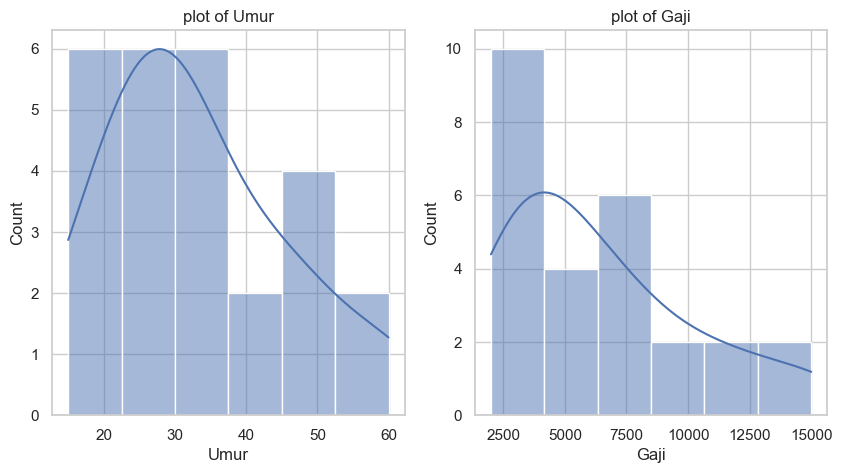

In [375]:
plt.figure(figsize=(10,5))
for i, col in enumerate(numeric_features):
    plt.subplot(1,2,i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f"plot of {col}")



In [376]:
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].median())
missing_values = df.isnull().sum()
missing_values


Umur          0
Gaji          0
Pendidikan    0
Status        0
Main_Game     0
dtype: int64

In [377]:
from sdv.single_table import ctgan  # huruf kecil!

# Buat instance CTGAN
model = ctgan.CTGAN(epochs=1000)

# Fit ke data
model.fit(df, discrete_columns=["Pendidikan", "Status", "Main_Game"])

# Generate data sintetis
synthetic_data = model.sample(400)
print(synthetic_data.head())


        Umur          Gaji Pendidikan         Status Main_Game
0  14.770090   4604.990549         S1        Menikah        Ya
1  22.119460   5416.443641         S2        Menikah     Tidak
2  61.723103  16740.675029         S3        Menikah     Tidak
3  29.303647   3636.029746         S1  Belum Menikah        Ya
4  37.172771   9590.908111         S1        Menikah     Tidak


In [378]:
synthetic_data.describe(include="all")

df = synthetic_data

In [379]:
df["Main_Game"].value_counts()

Main_Game
Tidak    231
Ya       169
Name: count, dtype: int64

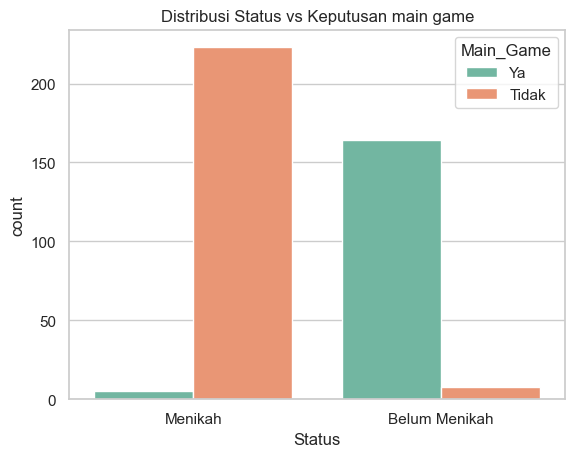

In [380]:
sns.countplot(x="Status", hue="Main_Game", data=df, palette="Set2")
plt.title("Distribusi Status vs Keputusan main game")
plt.show()


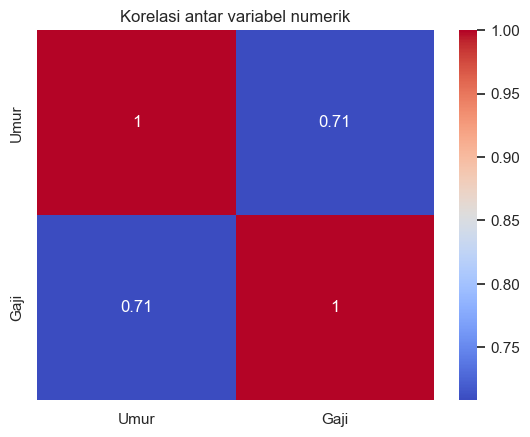

In [381]:
corr = df[["Umur", "Gaji"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Korelasi antar variabel numerik")
plt.show()


<Axes: xlabel='Status', ylabel='count'>

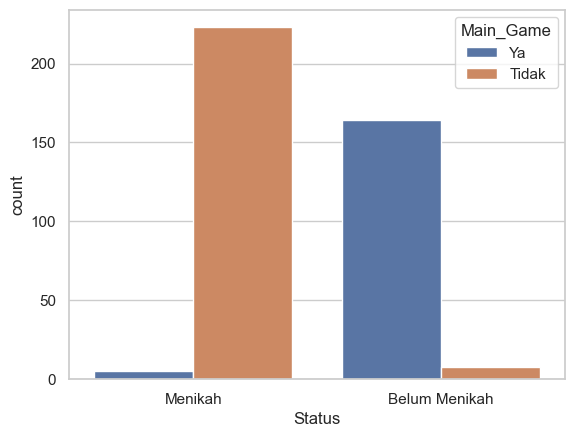

In [382]:
sns.countplot(x="Status", hue="Main_Game", data=df)

In [383]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

kategorical_features = df.select_dtypes(include="object").columns
for col in kategorical_features:
    df[col] = le.fit_transform(df[col])

df

,Umur,Gaji,Pendidikan,Status,Main_Game
0,14.770090,4604.990549,0,1,1
1,22.119460,5416.443641,1,1,0
2,61.723103,16740.675029,2,1,0
3,29.303647,3636.029746,0,0,1
4,37.172771,9590.908111,0,1,0
...,...,...,...,...,...
395,35.948996,8383.310712,1,1,0
396,36.501469,3264.008030,0,1,1
397,67.402041,16486.782478,2,1,0
398,26.032182,12562.332477,1,1,0


<Axes: xlabel='Status', ylabel='count'>

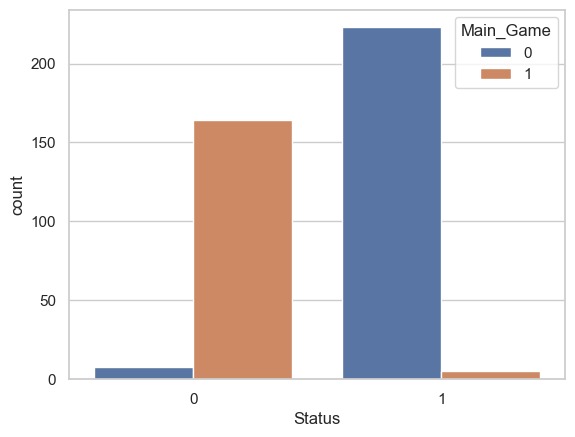

In [384]:
sns.countplot(x="Status", hue="Main_Game", data=df)


In [385]:
from sklearn.model_selection import train_test_split

X = df.drop(columns="Main_Game")
y = df["Main_Game"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 280
Test size: 120


In [386]:
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)

# Latih model
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [387]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

y_pred = dt_model.predict(X_test)

cv_scores_after = cross_val_score(dt_model, X, y, cv=10)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Cross-val scores:", cv_scores_after)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9416666666666667
Cross-val scores: [0.925 0.95  1.    0.975 0.95  1.    0.95  0.9   0.975 0.975]
Confusion Matrix:
 [[58  5]
 [ 2 55]]


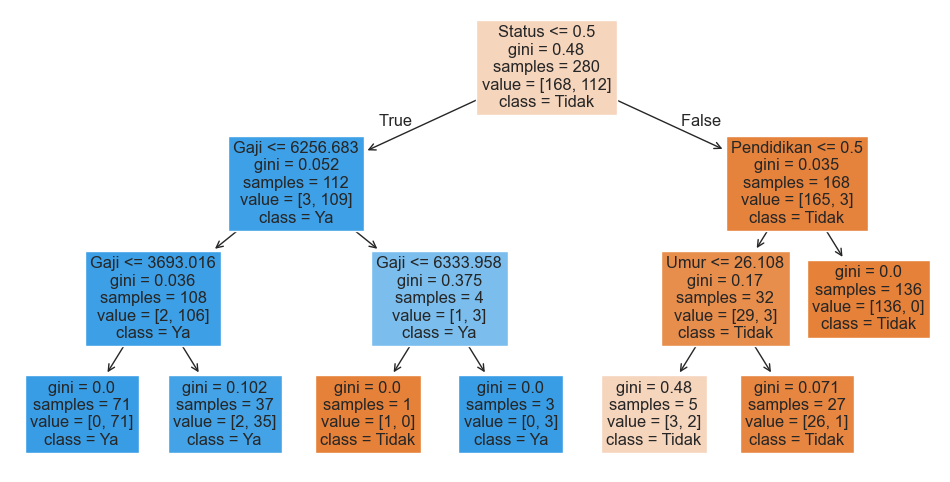

In [388]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plot_tree(dt_model, feature_names=X.columns, class_names=["Tidak","Ya"], filled=True)
plt.show()
